In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

# Sample sentence tokens
tokens = ["The", "cat", "sat", "on", "the", "mat"]
vocab_size = len(tokens)
embedding_dim = 8  # small for demo

# Random embeddings for each word token (normally learned)
torch.manual_seed(0)
embeddings = torch.rand(vocab_size, embedding_dim)


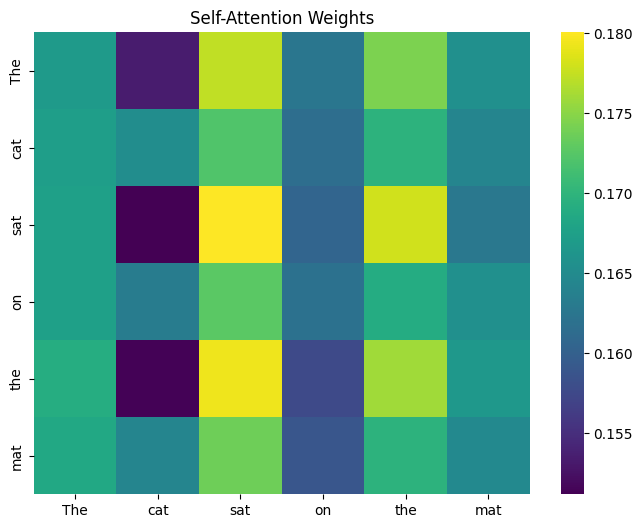

In [2]:
# --------- Part 2: Self-Attention ---------
class SelfAttention(nn.Module):
    def __init__(self, embed_dim):
        super().__init__()
        self.query = nn.Linear(embed_dim, embed_dim)
        self.key = nn.Linear(embed_dim, embed_dim)
        self.value = nn.Linear(embed_dim, embed_dim)
        self.scale = embed_dim ** 0.5

    def forward(self, x):
        Q = self.query(x)
        K = self.key(x)
        V = self.value(x)

        scores = torch.matmul(Q, K.transpose(-2, -1)) / self.scale
        weights = torch.softmax(scores, dim=-1)
        output = torch.matmul(weights, V)
        return weights, output

self_attention = SelfAttention(embedding_dim)
attn_weights, attn_output = self_attention(embeddings)

# Visualize self-attention weights
plt.figure(figsize=(8,6))
sns.heatmap(attn_weights.detach().numpy(), xticklabels=tokens, yticklabels=tokens, cmap='viridis')
plt.title("Self-Attention Weights")
plt.show()

In [5]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

# Sample sentence tokens
tokens = ["The", "dog", "chased", "the", "cat", "away"]
vocab_size = len(tokens)
embedding_dim = 4  # small for demo

# Random embeddings for each word token (normally learned)
torch.manual_seed(0)
embeddings = torch.rand(vocab_size, embedding_dim)


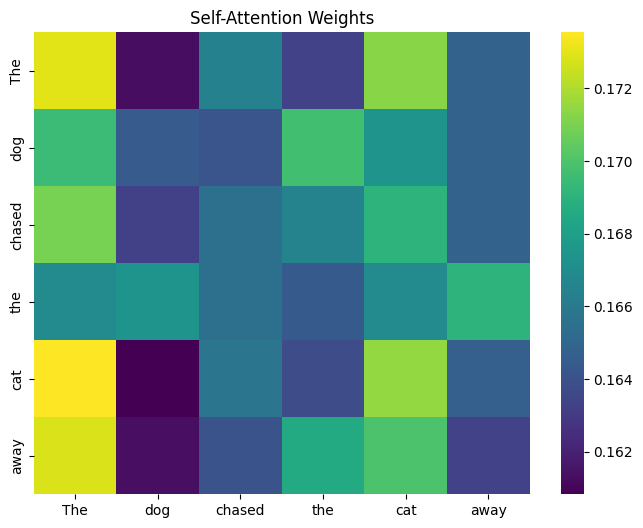

In [6]:
# --------- Part 2: Self-Attention ---------
class SelfAttention(nn.Module):
    def __init__(self, embed_dim):
        super().__init__()
        self.query = nn.Linear(embed_dim, embed_dim)
        self.key = nn.Linear(embed_dim, embed_dim)
        self.value = nn.Linear(embed_dim, embed_dim)
        self.scale = embed_dim ** 0.5

    def forward(self, x):
        Q = self.query(x)
        K = self.key(x)
        V = self.value(x)

        scores = torch.matmul(Q, K.transpose(-2, -1)) / self.scale
        weights = torch.softmax(scores, dim=-1)
        output = torch.matmul(weights, V)
        return weights, output

self_attention = SelfAttention(embedding_dim)
attn_weights, attn_output = self_attention(embeddings)

# Visualize self-attention weights
plt.figure(figsize=(8,6))
sns.heatmap(attn_weights.detach().numpy(), xticklabels=tokens, yticklabels=tokens, cmap='viridis')
plt.title("Self-Attention Weights")
plt.show()

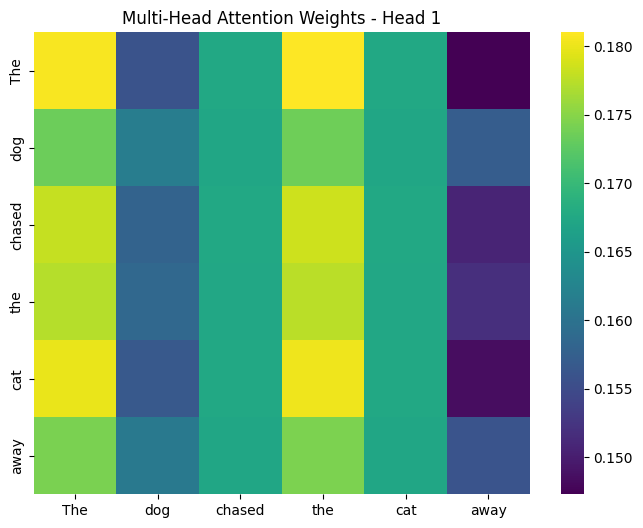

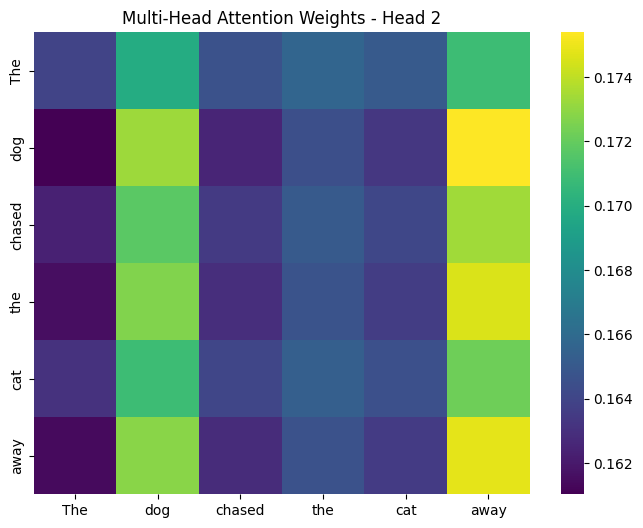

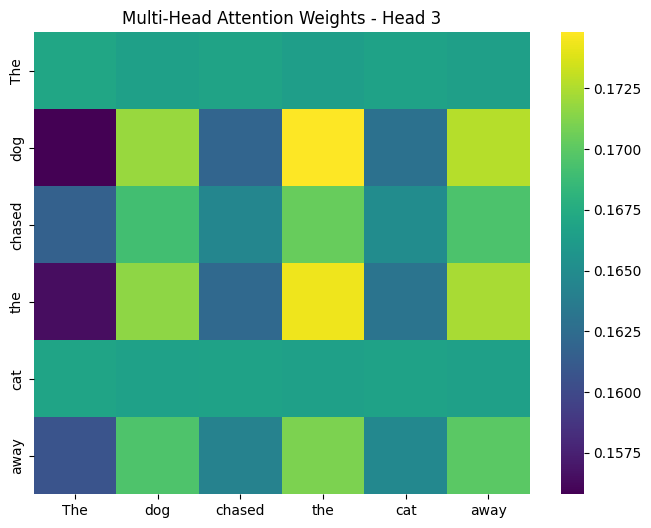

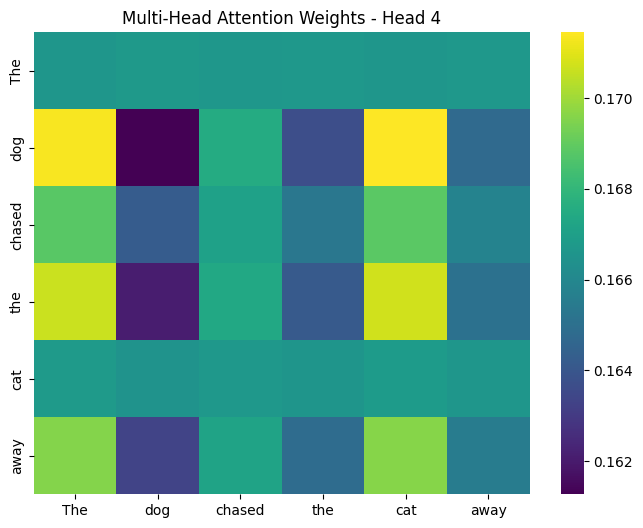

In [7]:
# --------- Part 3: Multi-Head Attention ---------
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        assert embed_dim % num_heads == 0
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        self.query = nn.Linear(embed_dim, embed_dim)
        self.key = nn.Linear(embed_dim, embed_dim)
        self.value = nn.Linear(embed_dim, embed_dim)
        self.out_proj = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        batch_size = x.shape[0] if x.ndim == 3 else 1
        Q = self.query(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        K = self.key(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)
        V = self.value(x).view(batch_size, -1, self.num_heads, self.head_dim).transpose(1, 2)

        scores = torch.matmul(Q, K.transpose(-2, -1)) / (self.head_dim ** 0.5)
        weights = torch.softmax(scores, dim=-1)
        output = torch.matmul(weights, V)
        output = output.transpose(1, 2).contiguous().view(batch_size, -1, self.num_heads * self.head_dim)

        output = self.out_proj(output)
        return weights, output

multihead_attention = MultiHeadAttention(embedding_dim, num_heads=4)
# Add batch dimension for multihead (batch=1)
multihead_weights, multihead_output = multihead_attention(embeddings.unsqueeze(0))

# Visualize each head's attention matrix individually
for i in range(multihead_attention.num_heads):
    plt.figure(figsize=(8,6))
    sns.heatmap(multihead_weights[0, i].detach().numpy(), xticklabels=tokens, yticklabels=tokens, cmap='viridis')
    plt.title(f"Multi-Head Attention Weights - Head {i+1}")
    plt.show()

In [9]:
class FeedForward(nn.Module):
    def __init__(self, embed_dim, hidden_dim):
        super().__init__()
        self.fc1 = nn.Linear(embed_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, embed_dim)

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

feed_forward = FeedForward(embedding_dim, hidden_dim=16)
ff_output = feed_forward(attn_output)

print("Shape of attention output:", attn_output.shape)
print("Shape of feedforward output:", ff_output.shape)

# Optional: Print vectors for first token as example
print("\nSample token 'The' embedding vectors:")
print("Attention output vector:", attn_output[0].detach().numpy())
print("Feedforward output vector:", ff_output[0].detach().numpy())

Shape of attention output: torch.Size([6, 4])
Shape of feedforward output: torch.Size([6, 4])

Sample token 'The' embedding vectors:
Attention output vector: [-0.31991166  0.6908908   1.0928605  -0.88587725]
Feedforward output vector: [-0.33517927  0.20169458 -0.51581764 -0.36198816]


In [11]:
import numpy as np

def positional_encoding(seq_len, embed_dim):
    position = torch.arange(seq_len, dtype=torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, embed_dim, 2).float() * (-np.log(10000.0) / embed_dim))
    pe = torch.zeros(seq_len, embed_dim)
    pe[:, 0::2] = torch.sin(position * div_term)
    pe[:, 1::2] = torch.cos(position * div_term)
    return pe

# Add before attention:
pos_encoding = positional_encoding(seq_len=len(tokens), embed_dim=embedding_dim)
embeddings = embeddings + pos_encoding

Movie plot

In [14]:
import spacy
nlp = spacy.load("en_core_web_sm")
tokens = [token.text for token in nlp("A scientist builds a time machine.")]


<Axes: >

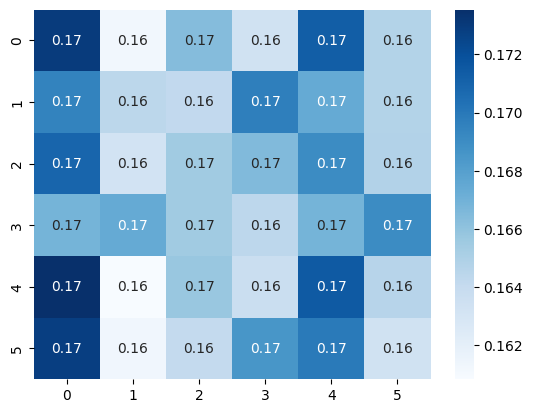

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(attn_weights.detach().numpy(), annot=True, cmap="Blues")

<Axes: >

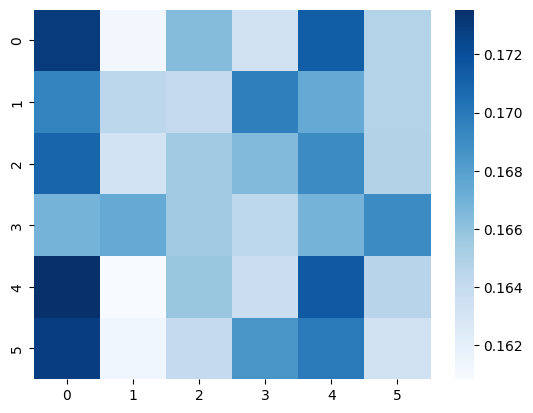

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(attn_weights.detach().numpy(), annot=False, cmap="Blues")

In [21]:
class PositionwiseFeedForward(nn.Module):
    def __init__(self, d_model, hidden_dim):
        super(PositionwiseFeedForward, self).__init__()
        self.linear1 = nn.Linear(d_model, hidden_dim)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim, d_model)

    def forward(self, x):
        return self.linear2(self.relu(self.linear1(x)))


In [22]:
ffn = PositionwiseFeedForward(d_model=32, hidden_dim=64)
